In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\climate_headlines_sentiment.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Headline,Link,Content,Sentiment,Justification
0,0,Australia's year ahead in climate and environm...,https://www.abc.net.au/news/science/2024-01-23...,The year has barely started and extreme weath...,0.0,The headline is unclear about its direct impac...
1,1,Projections reveal the vulnerability of freshw...,https://news.griffith.edu.au/2024/01/09/projec...,"“Water from groundwater, rivers and rainfall ...",-0.5,The vulnerability of freshwater is concerning ...
2,2,"Record heat in 2023 worsened global droughts, ...",https://www.anu.edu.au/news/all-news/record-he...,2023 saw an increase in the frequency and int...,-1.0,The headline describes worsening environmental...
3,3,"It's not just the total rainfall ""“ why is eas...",https://www.theguardian.com/australia-news/202...,The number of storms in some regions is decre...,0.0,The headline is unclear about its stance on cl...
4,4,Expert Commentary: 2023 was the warmest year o...,https://www.csiro.au/en/news/all/news/2024/jan...,The European Union's Copernicus Climate Chang...,-0.5,While highlighting the reality of climate chan...


In [22]:
# Drop the 'Unnamed: 0' column as it is just an index
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
df.isnull().sum()

Headline         0
Link             0
Content          0
Sentiment        1
Justification    1
dtype: int64

In [24]:
# Drop rows with missing sentiment values
df.dropna(subset=['Sentiment'], inplace=True)

# Verify missing values are handled
df.isnull().sum()

Headline         0
Link             0
Content          0
Sentiment        0
Justification    0
dtype: int64

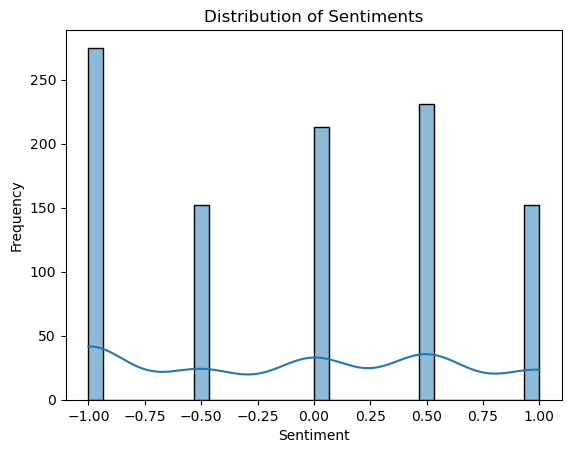

In [26]:
# Distribution of Sentiments
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df['Headline']
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred)

mse

1.1658411716334713